# Sunda Aksara Classification

Import raw data into colab

In [ ]:
!git clone https://github.com/ridhomujizat/AksaraSundaCNN/

Cloning into 'AksaraSundaCNN'...
remote: Enumerating objects: 5780, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 5780 (delta 3), reused 0 (delta 0), pack-reused 5767
Receiving objects: 100% (5780/5780), 145.21 MiB | 36.59 MiB/s, done.
Resolving deltas: 100% (299/299), done.
Checking out files: 100% (11371/11371), done.


Import package that we need

In [ ]:
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

Define root directory 

In [ ]:
root_path = '/content/AksaraSundaCNN'

root_path_train = os.path.join(root_path, 'train')
root_path_test = os.path.join(root_path, 'test')

Do the image augmentation and rescale image

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range = 0.2, height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.2, fill_mode='nearest')

train_data = train_datagen.flow_from_directory(
    directory=root_path_train,
    target_size=(112,112),
    color_mode="grayscale",
    batch_size=30)

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_data = validation_datagen.flow_from_directory(
    directory=root_path_test,
    target_size=(112,112),
    color_mode="grayscale",
    batch_size=30)

Found 3780 images belonging to 18 classes.
Found 1620 images belonging to 18 classes.


Fitur gambar

((354, 354), array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]))

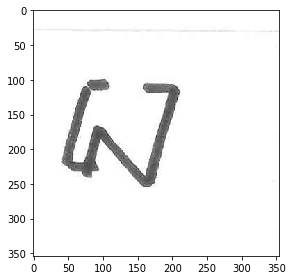

In [ ]:
image = imread('/content/AksaraSundaCNN/train/ba/ba.105.jpg', as_gray=True)
imshow(image)
#checking image shape 
image.shape, image

Define the model

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(256, (5,5), activation = 'relu', padding = 'same', input_shape=(112,112,1)),
      tf.keras.layers.LeakyReLU(alpha=0.2),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (5,5)),
      tf.keras.layers.LeakyReLU(alpha=0.3),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (5,5)),
      tf.keras.layers.LeakyReLU(alpha=0.3),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.GlobalMaxPool2D(),
      tf.keras.layers.Dense(1024),
      tf.keras.layers.LeakyReLU(alpha=0.2),
      tf.keras.layers.Dense(18, activation = 'softmax')
  ])


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy'])

Show model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 256)     6656      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 112, 112, 256)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 52, 52, 256)       1638656   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 52, 52, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 256)      0         
 2D)                                                    

Train model with 100 epochs

In [ ]:
history = model.fit_generator(generator = train_data, validation_data = validation_data, epochs=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
126/126 [==============================] - 82s 506ms/step - loss: 2.6990 - accuracy: 0.1108 - val_loss: 2.4270 - val_accuracy: 0.2099
Epoch 2/100
126/126 [==============================] - 63s 499ms/step - loss: 1.4496 - accuracy: 0.4971 - val_loss: 1.6424 - val_accuracy: 0.4704
Epoch 3/100
126/126 [==============================] - 63s 498ms/step - loss: 0.6277 - accuracy: 0.7767 - val_loss: 1.4680 - val_accuracy: 0.5531
Epoch 4/100
126/126 [==============================] - 63s 497ms/step - loss: 0.3773 - accuracy: 0.8643 - val_loss: 1.3707 - val_accuracy: 0.5451
Epoch 5/100
126/126 [==============================] - 63s 498ms/step - loss: 0.2706 - accuracy: 0.9034 - val_loss: 1.8199 - val_accuracy: 0.5321
Epoch 6/100
126/126 [==============================] - 63s 498ms/step - loss: 0.2272 - accuracy: 0.9198 - val_loss: 1.3649 - val_accuracy: 0.6284
Epoch 7/100
126/126 [==============================] - 63s 499ms/step - loss: 0.1916 - accuracy: 0.9304 - val_loss: 1.3348 -

Plot the chart for accuracy and loss on both training and validation

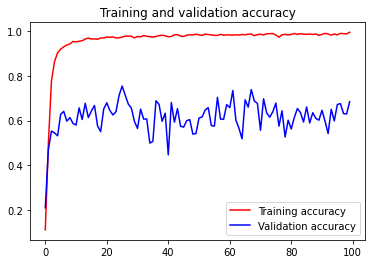

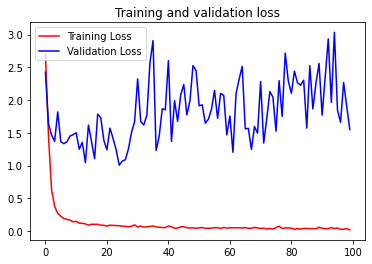

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()